# Predicting Heart Disease using Machine Learning

This notebook uses various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a Heart Disease based on their medical attributes.

We're going to take the following approach:
1. [Problem Definition](#definition)
2. [Data](#data) 
3. [Evaluation](#evaluation)
4. [Features](#features)
5. [Modelling](#modelling)
6. [Experimentation](#experimentation)

## <a name="definition">1. Problem Definition</a>

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not a they have a heart disease or not?

## <a name="data">2. Data</a>

[Heart Disease UCI - Original Version](https://archive.ics.uci.edu/ml/datasets/heart+disease)


[Heart Disease UCI - Kaggle Version](https://www.kaggle.com/ronitf/heart-disease-uci)

## <a name="evaluation">3.Evaluation</a>

> If we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## <a name="features">4.Features</a>

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

In [2]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

---------

 ## Load data

In [3]:
df = pd.read_csv('data/heart-disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


--------

## Exploratory Data Analysis (EDA)

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What are the missing data and how are we going to handle them?
4. What are the outliers, why we care about them and how are we going to handle them?
5. How can we add, change or remove features to get more out of the data?

In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# check if there is any missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# how many classes are in target variable?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

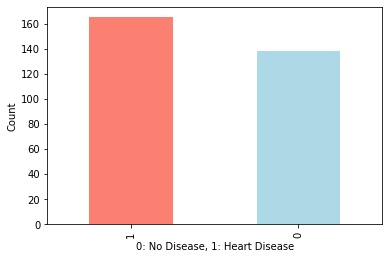

In [60]:
# visulaiztion of classes
# sns.countplot(x=df['target']);
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

Seem like there are 2 categories and pretty balanced dataset.

-------

## Finding Patterns in data

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Heart disease frequency according to Sex

In [18]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

There are about 207 male and 96 females. So we have more male population, so we need to keep that in back of our mind

(1 = male; 0 = female)

In [19]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [21]:
72/(24+72), 93/(114+93)

(0.75, 0.4492753623188406)

We can see that based on existing data, there are 75% chances that female can have a heart disease. For male, there are 45% chance.

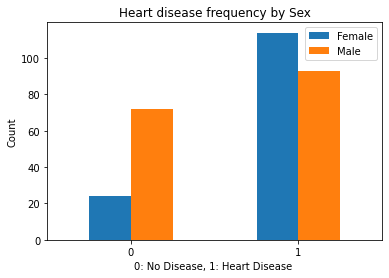

In [62]:
# visualize the data
# pd.crosstab(df['sex'], df['target']).plot(kind='bar', color=['salmon', 'lightblue']);

pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: No Disease, 1: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

### Age Vs Max. Heart Rate for people who have Heart Disease

In [37]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

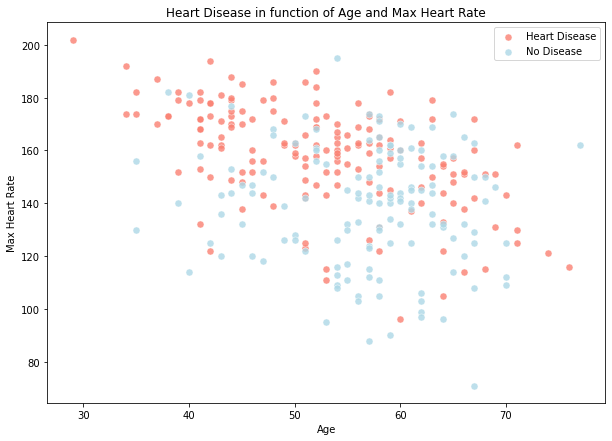

In [81]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data=df, x=df.age[df.target==1], y=df.thalach[df.target==1], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data=df, x=df.age[df.target==0], y=df.thalach[df.target==0], color='lightblue', s=50, alpha=0.8)

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');
plt.legend(['Heart Disease', 'No Disease']);

### Distribution of Age

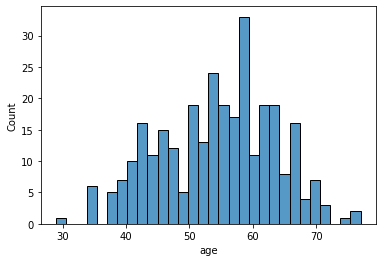

In [92]:
sns.histplot(data=df, x=df['age'], bins=30);

### Heart Disease Frequency per Chest Pain level

cp - chest pain type 
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

In [93]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


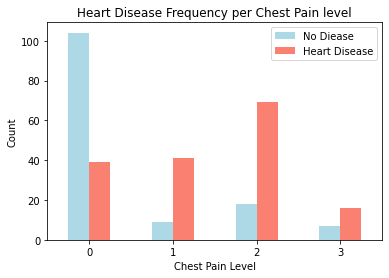

In [132]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

### Correlation between indepedent variables

In [113]:
df.corr()['target'][:-1]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
Name: target, dtype: float64

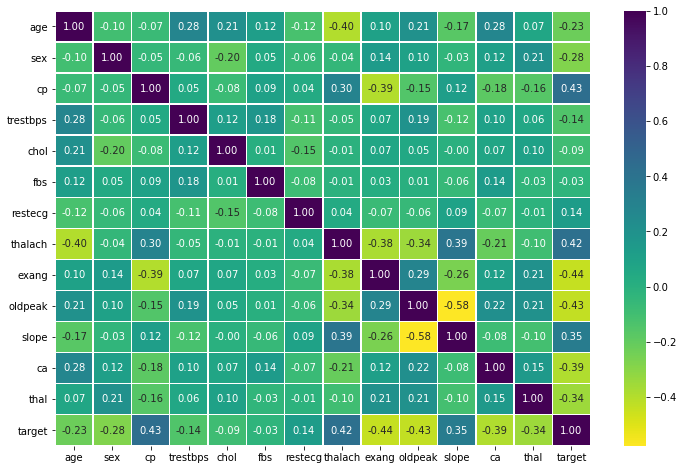

In [130]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

As per the heatmap above, `Chest pain (cp)` has the highest positive correlation with Target variable among the features, followed by `thalach (Maximum Heart Rate)` variable.

On the other hand, `exang - exercise induced angina` and `oldpeak - ST depression induced by exercise relative to rest` have the lowest correlation with Target variable.

--------

## <a name="modelling">5. Modelling</a>

In [134]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [135]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [136]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [137]:
y.head(2)

0    1
1    1
Name: target, dtype: int64

In [138]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

As there is no missing data and no values to convert from categorical to numerical values, we will continue to build model and train them .

### Model Training


We will try 3 different models.

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [156]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [158]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

### Model Comparison

In [161]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.885246,0.688525,0.836066


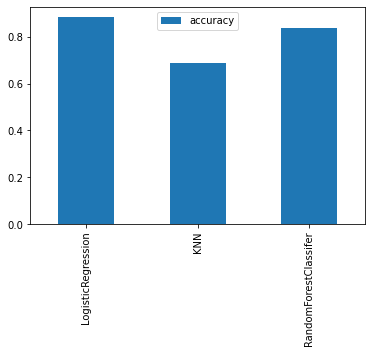

In [165]:
model_compare.T.plot(kind='bar');

---------

## <a name="experimentation">6.Experimentation</a>

### Tuning or Improving our models

Now we've got baseline models. and we might want to experiment to improve the results.

We will be doing:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)


### Hyperparameter Tuning
1. [Hyperparameter Tuning - Manually](#manually)
2. [Hyperparameter Tuning - using RandomizedSearchCV](#randomized)
3.[Hyperparameter Tuning - using GridSearchCV](#grid)

### <a name='manually'>Hyperparameter Tuning - Manually</a>

In [168]:
train_scores = []
test_scores = []

### KNN 

In [169]:
# create a different values of  parameters
neighbours = range(1, 21)

# instantiate instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbours:
    # set param
    knn.set_params(n_neighbors=i)
    
    # fit model
    knn.fit(X_train, y_train)
    
    # get score
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


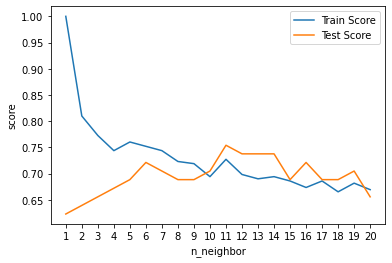

In [180]:
plt.plot(neighbours, train_scores, label='Train Score')
plt.plot(neighbours, test_scores, label='Test Score');

plt.xticks(np.arange(1,21,1))
plt.legend();
plt.xlabel('n_neighbor')
plt.ylabel('score');

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

-----

## <a name='randomized'>Hyperparameter Tuning - using RandomizedSearchCV</a>

We are going to tune the following models using RandomizedSearchCV.

* Logistic Regression

* RandomForest Classifier


In [182]:
#  help(LogisticRegression)

In [183]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [186]:
# help(RandomForestClassifier)

#### Create Hyperparameter Grid

In [195]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# create hyperparameter grid for Random Forest Classifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

#### Create RandomizedSearchCV with created Hyperparameter Grid (Logistic Regression)

In [189]:
np.random.seed(42)

# set up random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                                        log_reg_grid, 
                                                        cv=5, 
                                                        n_iter=20, 
                                                        verbose=True)

# fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [190]:
# check best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [199]:
# check the score
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [202]:
# comparing with baseline scores
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

#### Create RandomizedSearchCV with created Hyperparameter Grid (Random Forest Classifier)

In [196]:
np.random.seed(42)

# set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparamter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [198]:
# check best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [200]:
# check the score
rs_rf.score(X_test, y_test)

0.8688524590163934

In [201]:
# comparing with baseline scores
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

**We can see that between LogisticRegression and RandomForestClassifier using RandomizedSearchCV, LogisticRegression score is better.**

**So we will explore using LogisticRegression with GridSearchCV to further improve the performance.**

---------

## <a name='grid'>Hyperparameter Tuning - using GridSearchCV</a>

We are going to tune the following models using GridSearchCV.

* Logistic Regression

In [203]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [205]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [204]:
# get the score
gs_log_reg.score(X_test, y_test)

0.8852459016393442